In [8]:
#dataset    http://cb.lk/covid_19

!wget  http://cb.lk/covid_19

--2020-08-19 09:37:25--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-08-19 09:37:26--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-08-19 09:37:26--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-08-19 09:37:26--  https://www.dropbox.com/s/raw/7

In [9]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [10]:
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Val"

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [21]:
# CNN based model in keras

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
# adam means gradient optimization  and accracy stands for classification metrices

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [23]:
# train from scratch 


train_datagen = image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset = image.ImageDataGenerator(rescale=(1./255))

In [24]:
train_generator = train_datagen.flow_from_directory(
    "CovidDataset/Train",
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [25]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [26]:
validation_generator = test_dataset.flow_from_directory(
    "CovidDataset/Val",
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [27]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

# training

In [31]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=6,
    epochs=10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 0.3623 - accuracy: 0.8594 - val_loss: 0.2356 - val_accuracy: 0.9333
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.2201 - accuracy: 0.9010 - val_loss: 0.2801 - val_accuracy: 0.8667
Epoch 3/10
6/6 [==============================] - 9s 2s/step - loss: 0.3157 - accuracy: 0.8750 - val_loss: 0.1215 - val_accuracy: 0.9500
Epoch 4/10
6/6 [==============================] - 9s 2s/step - loss: 0.3224 - accuracy: 0.8802 - val_loss: 0.1811 - val_accuracy: 0.9667
Epoch 5/10
6/6 [==============================] - 9s 2s/step - loss: 0.2151 - accuracy: 0.9375 - val_loss: 0.1421 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 9s 2s/step - loss: 0.1632 - accuracy: 0.9427 - val_loss: 0.0964 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 9s 2s/step - loss: 0.1611 - accuracy: 0.9635 - val_loss: 0.1252 - val_accuracy: 0.9667
Epoch 8/10
6/6 [========================

# how to save a model(updated noteboo starts from here)

In [32]:

model.save("my_model_covid.h5")

In [35]:
model.evaluate(train_generator)


7/7 [==============================] - 7s 1s/step - loss: 0.0880 - accuracy: 0.9777


[0.08801005035638809, 0.9776785969734192]

In [36]:
model.evaluate(validation_generator)

2/2 [==============================] - 1s 406ms/step - loss: 0.0577 - accuracy: 0.9833


[0.05774401128292084, 0.9833333492279053]

In [37]:
model=load_model('my_model_covid.h5')
import os

In [38]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [39]:
y_actual=[]
y_test=[]

In [40]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes( img)
  y_test.append(p[0,0])
  y_actual.append(1)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes( img)
  y_test.append(p[0,0])
  y_actual.append(1)


In [42]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm=confusion_matrix(y_actual,y_test)

In [45]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


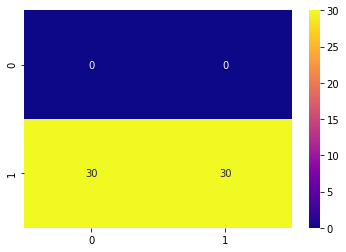

In [46]:
sns.heatmap(cm,cmap='plasma',annot=True)